# Filename: PC_CosineDistance(NoLvsSGD)
## Load file from checkpoint_submission folder attached
### PC_dim_SGD.h5 - Adversarial Dimension of SGD Model calculated in ResNet18_SGD file
### PC_dim_NoL.h5 - Adversarial Dimension of NoL Model calculated in ResNet18_NoL file

In [1]:
from __future__ import print_function
import torch
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import cv2
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import torchvision
device_id =2
torch.cuda.set_device(device_id)

In [2]:
state= torch.load('./checkpoint_submission/PC_dim_SGD.h5')
x_adv_t_1 =state['x_adv_t']
x_clean_t_1 =state['x_clean_t']
state= torch.load('./checkpoint_submission/PC_dim_NoL.h5')
x_adv_t_2 =state['x_adv_t']
x_clean_t_2 =state['x_clean_t']

In [3]:
import scipy.spatial
dist_high1=np.zeros(704)
dist_high2=np.zeros(704)
for high in range(0,704):
    dist_high_x, dist_high_y = 0, 0
    for i in range(0,704):
        dist_high_x += (scipy.spatial.distance.pdist(np.array((x_adv_t_1[i,0:high],
                                                          x_clean_t_1[i,0:high])), 'cosine'))
        dist_high_y += (scipy.spatial.distance.pdist(np.array((x_adv_t_2[i,0:high],
                                                          x_clean_t_2[i,0:high])), 'cosine'))
    dist_high1[high]=np.mean(dist_high_x/704)
    dist_high2[high]=np.mean(dist_high_y/704)

Text(0,0.5,'Cosine Distance')

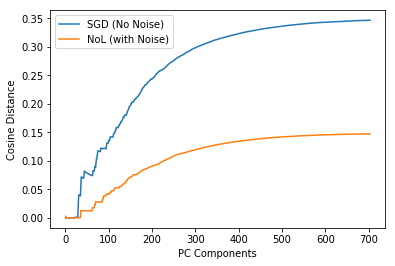

In [4]:
val=704
start=0
plt.plot(np.arange(start,val), dist_high1[start:val])
plt.plot(np.arange(start,val), dist_high2[start:val])
plt.legend(['SGD (No Noise)', 'NoL (with Noise)'])
plt.xlabel('PC Components')
plt.ylabel('Cosine Distance')